SLEEP HEALTH CLASSIFICATION ANALYSIS
Dataset shape: (374, 22)
Dataset columns: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher', 'BMI Category_Normal Weight', 'BMI Category_Obese', 'BMI Category_Overweight', 'Sleep Disorder_None', 'Sleep Disorder_Sleep Apnea']

Target variable columns identified: ['Sleep Disorder_None', 'Sleep Disorder_Sleep Apnea']

Target variable classes: ['None', 'Sleep Apnea']
Class distribution:
  None: 296 samples (79.1%)
  Sleep Apnea: 78 samples (20.9%)

Feature matrix shape: (374, 20)
Target variable shape: (374,)

Training set size: 299 samples
Testing set size: 75 samples
Number of features: 20
Target classes: ['None', 'Sleep Apnea']

1. LOGISTIC RE

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Best Model Report:
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.9398
Test Set Accuracy: 0.9467 (94.67%)

Detailed Classification Report:
              precision    recall  f1-score   support

        None       0.98      0.95      0.97        59
 Sleep Apnea       0.83      0.94      0.88        16

    accuracy                           0.95        75
   macro avg       0.91      0.94      0.92        75
weighted avg       0.95      0.95      0.95        75


Logistic Regression Confusion Matrix (Test Set):
----------------------------------------------------------------------
Actual \ Predicted      | None            | Sleep Apnea    
----------------------------------------------------------------------
None                 | 56              | 3               | 
Sleep Apnea          | 1               | 15              | 
----------------------------------------------------------------------


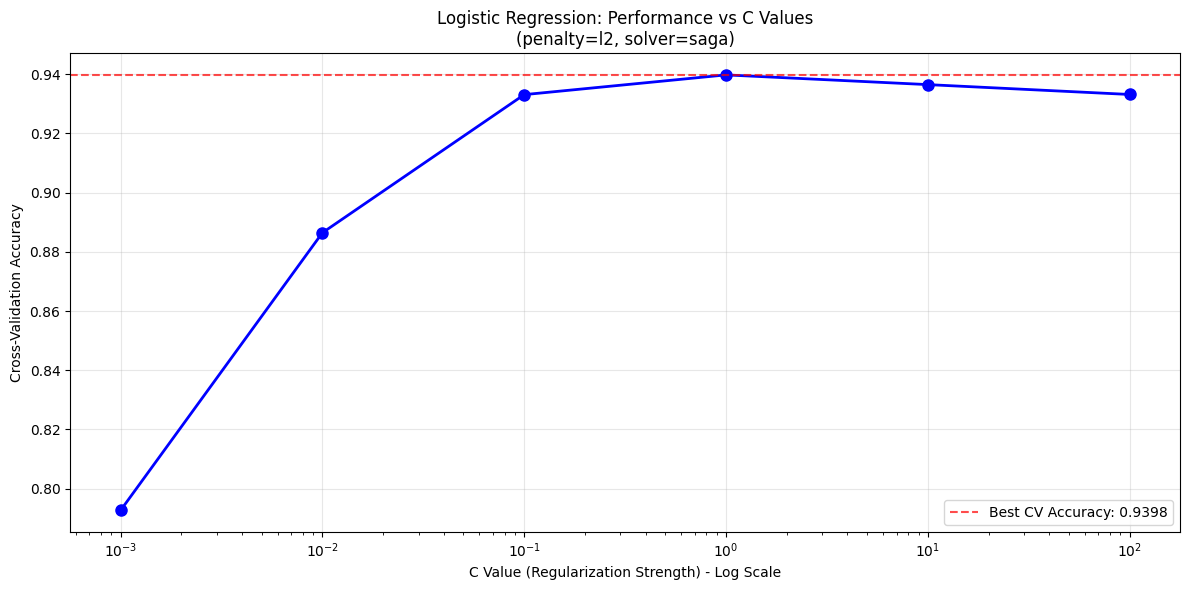


2. SUPPORT VECTOR CLASSIFIER (SVC) - Sleep Disorder Classification
Running GridSearchCV for SVC...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

SVC Best Model Report:
Best Hyperparameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9566
Test Set Accuracy: 0.9200 (92.00%)

Detailed Classification Report:
              precision    recall  f1-score   support

        None       0.95      0.95      0.95        59
 Sleep Apnea       0.81      0.81      0.81        16

    accuracy                           0.92        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.92      0.92      0.92        75


SVC Confusion Matrix (Test Set):
----------------------------------------------------------------------
Actual \ Predicted      | None            | Sleep Apnea    
----------------------------------------------------------------------
None                 | 56              | 3               | 
Sleep Apnea          | 3

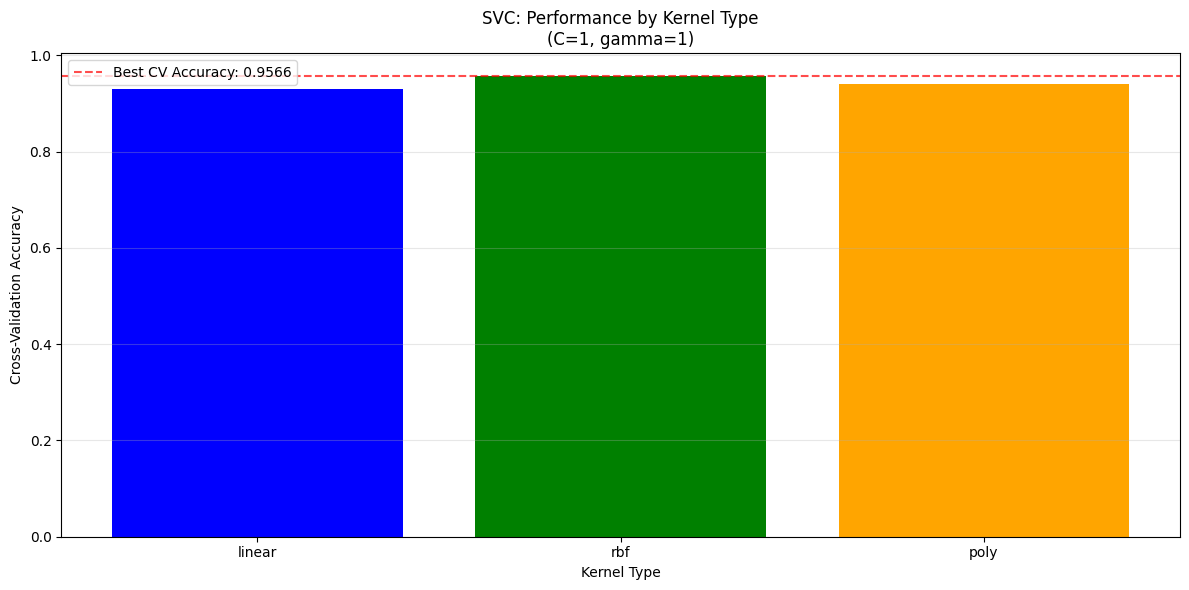


3. K-NEAREST NEIGHBORS (KNN) - Sleep Disorder Classification
Running GridSearchCV for KNN...
Fitting 5 folds for each of 180 candidates, totalling 900 fits

KNN Best Model Report:
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9399
Test Set Accuracy: 0.9200 (92.00%)

Detailed Classification Report:
              precision    recall  f1-score   support

        None       0.95      0.95      0.95        59
 Sleep Apnea       0.81      0.81      0.81        16

    accuracy                           0.92        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.92      0.92      0.92        75


KNN Confusion Matrix (Test Set):
----------------------------------------------------------------------
Actual \ Predicted      | None            | Sleep Apnea    
----------------------------------------------------------------------
None                 | 56              | 3               | 
Sl

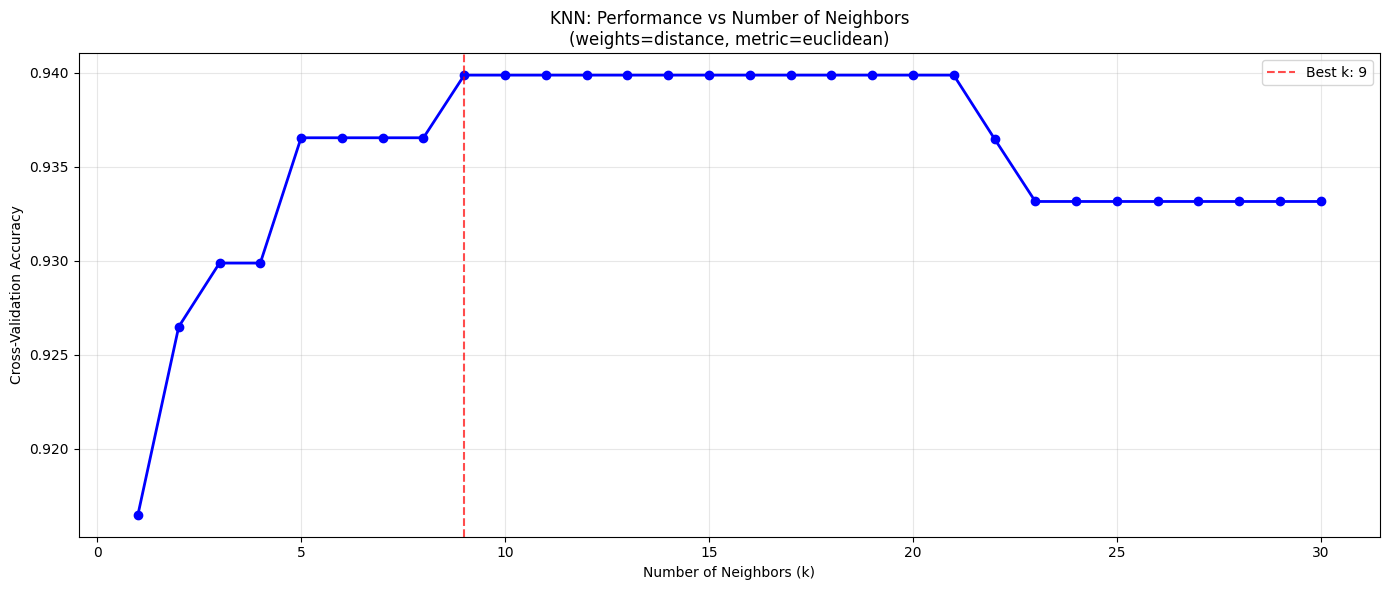


MODEL COMPARISON SUMMARY - Sleep Disorder Classification

              Model  Best CV Accuracy  Test Accuracy                                                  Best Parameters
Logistic Regression          0.939774       0.946667                      {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
                SVC          0.956554       0.920000                            {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
                KNN          0.939887       0.920000 {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


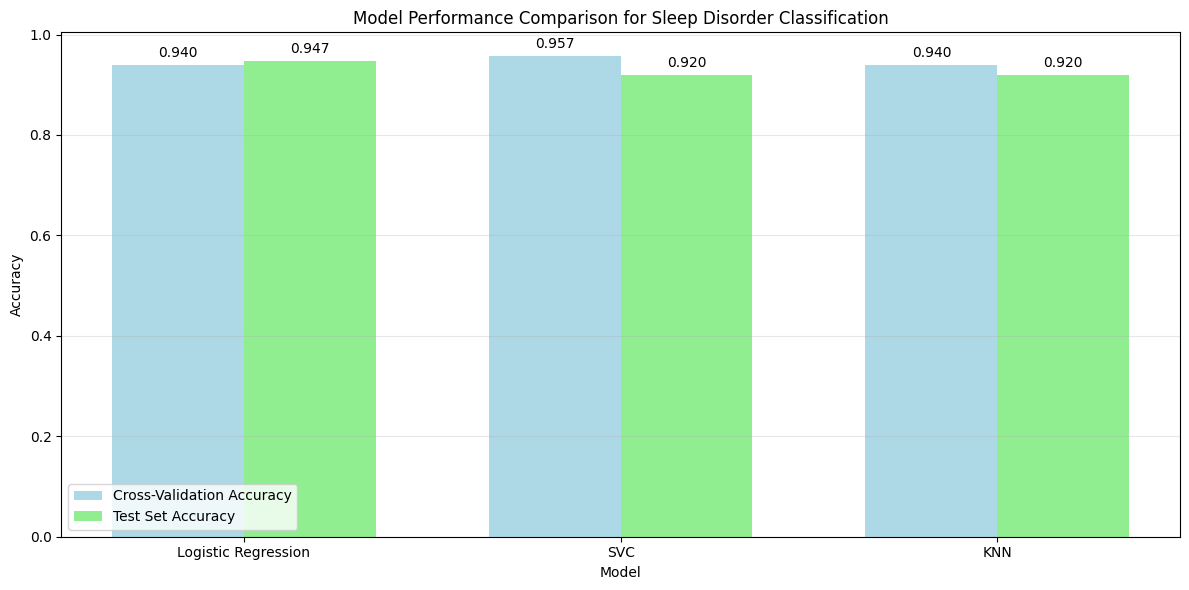


LEARNING CURVE ANALYSIS


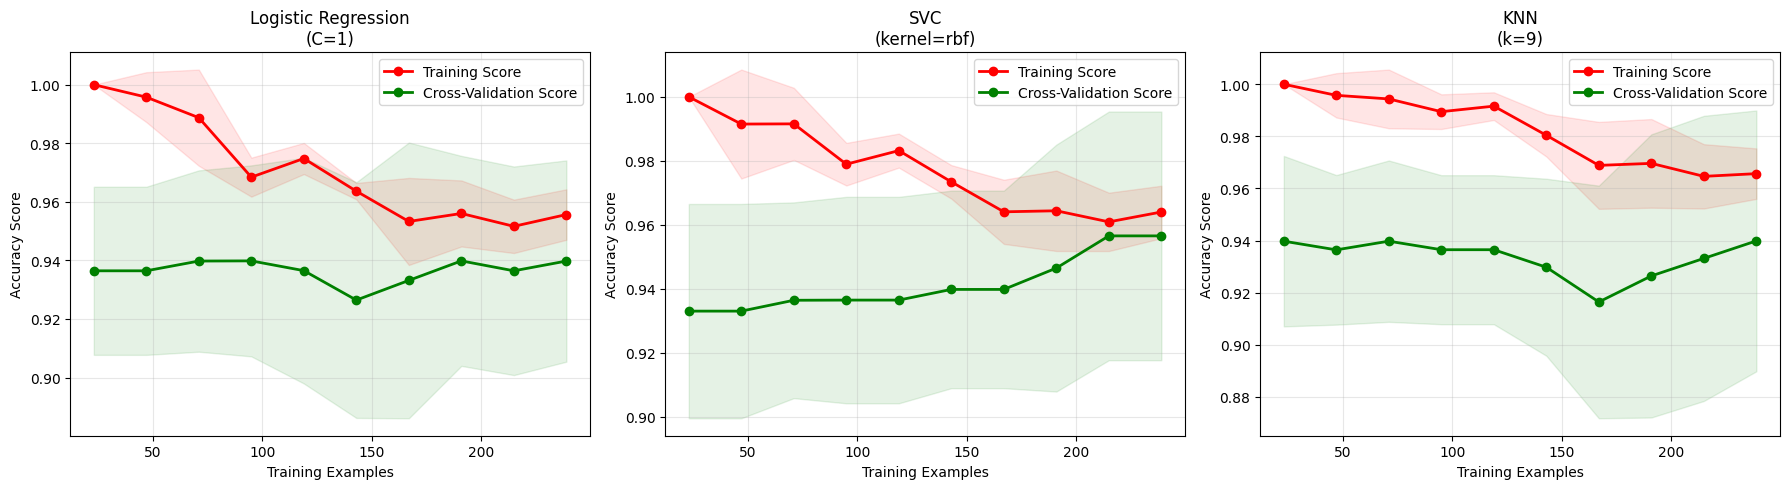


Learning Curve Analysis (Final Scores with Full Training Data):
----------------------------------------------------------------------
Model                     Training Score       CV Score             Gap            
----------------------------------------------------------------------
Logistic Regression       0.9556               0.9398               0.0159          (Good Fit)
SVC                       0.9640               0.9566               0.0075          (Good Fit)
KNN                       0.9657               0.9399               0.0258          (Good Fit)
----------------------------------------------------------------------

DETAILED ERROR ANALYSIS

Logistic Regression Error Analysis:
----------------------------------------
  None: Accuracy = 0.949 
  Sleep Apnea: Accuracy = 0.938 

SVC Error Analysis:
----------------------------------------
  None: Accuracy = 0.949 
  Sleep Apnea: Accuracy = 0.812 

KNN Error Analysis:
----------------------------------------
  None: 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split, cross_val_score,GridSearchCV, learning_curve)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load the processed sleep health dataset
# Assuming you've run the previous preprocessing code and have the encoded data
data = pd.read_csv('https://raw.githubusercontent.com/Salina-Huang/Programming-for-AI-Sleep-Health-and-Lifestyle-Model/refs/heads/main/sleep_health_encoded_onehot.csv')

print("SLEEP HEALTH CLASSIFICATION ANALYSIS")
print("=" * 70)
print(f"Dataset shape: {data.shape}")
print(f"Dataset columns: {list(data.columns)}")

# Identify target variable columns (Sleep Disorder)
target_columns = [col for col in data.columns if 'Sleep Disorder' in col]
print(f"\nTarget variable columns identified: {target_columns}")

# Create a single target variable for multi-class classification
if len(target_columns) > 1:
    # Create single column target variable
    y = data[target_columns].idxmax(axis=1)
    y = y.str.replace('Sleep Disorder_', '')

    # Create feature matrix (exclude all target columns)
    X = data.drop(columns=target_columns)

    # Create label mapping for clarity
    label_mapping = {i: label for i, label in enumerate(y.unique())}
    label_mapping_reverse = {label: i for i, label in label_mapping.items()}
    y_encoded = y.map(label_mapping_reverse)

    print(f"\nTarget variable classes: {list(label_mapping.values())}")
    print(f"Class distribution:")
    for label, encoded_value in label_mapping_reverse.items():
        count = (y == label).sum()
        percentage = (count / len(y)) * 100
        print(f"  {label}: {count} samples ({percentage:.1f}%)")
else:
    # For binary classification
    X = data.drop(columns=target_columns)
    y = data[target_columns[0]]
    y_encoded = y
    print(f"\nBinary classification target: {target_columns[0]}")
    print(f"Class distribution:")
    for value in y.unique():
        count = (y == value).sum()
        percentage = (count / len(y)) * 100
        print(f"  {value}: {count} samples ({percentage:.1f}%)")

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target variable shape: {y_encoded.shape}")

# Standardize features (required for Logistic Regression, SVC, KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# For unscaled data (if needed for other models)
X_train, X_test, _, _ = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Get target class names for reporting
if 'label_mapping' in locals():
    target_names = [label_mapping[i] for i in sorted(label_mapping.keys())]
else:
    target_names = sorted(y_encoded.unique())

print(f"\nTraining set size: {len(X_train_scaled)} samples")
print(f"Testing set size: {len(X_test_scaled)} samples")
print(f"Number of features: {X.shape[1]}")
print(f"Target classes: {target_names}")


# 1. Logistic Regression with GridSearchCV
print("\n" + "="*70)
print("1. LOGISTIC REGRESSION MODEL - Sleep Disorder Classification")
print("="*70)

# Define hyperparameter grid for Logistic Regression
logistic_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize and run GridSearchCV
logistic_grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000, multi_class='auto'),
    param_grid=logistic_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
print("Running GridSearchCV for Logistic Regression...")
logistic_grid_search.fit(X_train_scaled, y_train)

# Extract best model and results
best_logistic_model = logistic_grid_search.best_estimator_
best_logistic_params = logistic_grid_search.best_params_
best_logistic_score = logistic_grid_search.best_score_

# Evaluate on test set
best_logistic_predict = best_logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, best_logistic_predict)

print('\nLogistic Regression Best Model Report:')
print(f'Best Hyperparameters: {best_logistic_params}')
print(f'Best Cross-Validation Accuracy: {best_logistic_score:.4f}')
print(f'Test Set Accuracy: {logistic_accuracy:.4f} ({logistic_accuracy*100:.2f}%)')

print('\nDetailed Classification Report:')
print(classification_report(y_test, best_logistic_predict, target_names=target_names))

# Confusion Matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, best_logistic_predict)
print("\nLogistic Regression Confusion Matrix (Test Set):")
print("-" * 70)
print("Actual \\ Predicted" + " " * 5 + " | " + " | ".join([f"{name:<15}" for name in target_names]))
print("-" * 70)
for i, actual in enumerate(target_names):
    row = f"{actual:<20} | "
    for j in range(len(target_names)):
        row += f"{lr_cm[i, j]:<15} | "
    print(row)
print("-" * 70)

# Visualize C parameter performance
C_values = []
C_scores = []
for i, params in enumerate(logistic_grid_search.cv_results_['params']):
    if params['penalty'] == best_logistic_params['penalty'] and params['solver'] == best_logistic_params['solver']:
        C_values.append(params['C'])
        C_scores.append(logistic_grid_search.cv_results_['mean_test_score'][i])

# Sort by C values
sorted_indices = np.argsort(C_values)
C_values_sorted = np.array(C_values)[sorted_indices]
C_scores_sorted = np.array(C_scores)[sorted_indices]

plt.figure(figsize=(12, 6))
plt.plot(C_values_sorted, C_scores_sorted, 'bo-', linewidth=2, markersize=8)
plt.axhline(y=best_logistic_score, color='red', linestyle='--', alpha=0.7, label=f'Best CV Accuracy: {best_logistic_score:.4f}')
plt.xscale('log')
plt.xlabel('C Value (Regularization Strength) - Log Scale')
plt.ylabel('Cross-Validation Accuracy')
plt.title(f'Logistic Regression: Performance vs C Values\n(penalty={best_logistic_params["penalty"]}, solver={best_logistic_params["solver"]})')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# 2. Support Vector Classifier (SVC) with GridSearchCV
print("\n" + "="*70)
print("2. SUPPORT VECTOR CLASSIFIER (SVC) - Sleep Disorder Classification")
print("="*70)

# Define hyperparameter grid for SVC
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Initialize and run GridSearchCV for SVC
svc_grid_search = GridSearchCV(
    estimator=SVC(random_state=42, probability=True),
    param_grid=svc_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
print("Running GridSearchCV for SVC...")
svc_grid_search.fit(X_train_scaled, y_train)

# Extract best model and results
best_svc_model = svc_grid_search.best_estimator_
best_svc_params = svc_grid_search.best_params_
best_svc_score = svc_grid_search.best_score_

# Evaluate on test set
best_svc_predict = best_svc_model.predict(X_test_scaled)
svc_accuracy = accuracy_score(y_test, best_svc_predict)

print('\nSVC Best Model Report:')
print(f'Best Hyperparameters: {best_svc_params}')
print(f'Best Cross-Validation Accuracy: {best_svc_score:.4f}')
print(f'Test Set Accuracy: {svc_accuracy:.4f} ({svc_accuracy*100:.2f}%)')

print('\nDetailed Classification Report:')
print(classification_report(y_test, best_svc_predict, target_names=target_names))

# Confusion Matrix for SVC
svc_cm = confusion_matrix(y_test, best_svc_predict)
print("\nSVC Confusion Matrix (Test Set):")
print("-" * 70)
print("Actual \\ Predicted" + " " * 5 + " | " + " | ".join([f"{name:<15}" for name in target_names]))
print("-" * 70)
for i, actual in enumerate(target_names):
    row = f"{actual:<20} | "
    for j in range(len(target_names)):
        row += f"{svc_cm[i, j]:<15} | "
    print(row)
print("-" * 70)

# Visualize kernel performance
kernel_types = []
kernel_scores = []
for i, params in enumerate(svc_grid_search.cv_results_['params']):
    if params['C'] == best_svc_params['C'] and params['gamma'] == best_svc_params['gamma']:
        kernel_types.append(params['kernel'])
        kernel_scores.append(svc_grid_search.cv_results_['mean_test_score'][i])

plt.figure(figsize=(12, 6))
plt.bar(kernel_types, kernel_scores, color=['blue', 'green', 'orange', 'red'])
plt.axhline(y=best_svc_score, color='red', linestyle='--', alpha=0.7,
           label=f'Best CV Accuracy: {best_svc_score:.4f}')
plt.xlabel('Kernel Type')
plt.ylabel('Cross-Validation Accuracy')
plt.title(f'SVC: Performance by Kernel Type\n(C={best_svc_params["C"]}, gamma={best_svc_params["gamma"]})')
plt.grid(True, alpha=0.3, axis='y')
plt.legend()
plt.tight_layout()
plt.show()


# 3. K-Nearest Neighbors (KNN) with GridSearchCV
print("\n" + "="*70)
print("3. K-NEAREST NEIGHBORS (KNN) - Sleep Disorder Classification")
print("="*70)

# Define hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize and run GridSearchCV for KNN
knn_grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
print("Running GridSearchCV for KNN...")
knn_grid_search.fit(X_train_scaled, y_train)

# Extract best model and results
best_knn_model = knn_grid_search.best_estimator_
best_knn_params = knn_grid_search.best_params_
best_knn_score = knn_grid_search.best_score_

# Evaluate on test set
best_knn_predict = best_knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, best_knn_predict)

print('\nKNN Best Model Report:')
print(f'Best Hyperparameters: {best_knn_params}')
print(f'Best Cross-Validation Accuracy: {best_knn_score:.4f}')
print(f'Test Set Accuracy: {knn_accuracy:.4f} ({knn_accuracy*100:.2f}%)')

print('\nDetailed Classification Report:')
print(classification_report(y_test, best_knn_predict, target_names=target_names))

# Confusion Matrix for KNN
knn_cm = confusion_matrix(y_test, best_knn_predict)
print("\nKNN Confusion Matrix (Test Set):")
print("-" * 70)
print("Actual \\ Predicted" + " " * 5 + " | " + " | ".join([f"{name:<15}" for name in target_names]))
print("-" * 70)
for i, actual in enumerate(target_names):
    row = f"{actual:<20} | "
    for j in range(len(target_names)):
        row += f"{knn_cm[i, j]:<15} | "
    print(row)
print("-" * 70)

# Visualize K performance for best weight and metric combination
k_values = []
k_scores = []
for i, params in enumerate(knn_grid_search.cv_results_['params']):
    if params['weights'] == best_knn_params['weights'] and params['metric'] == best_knn_params['metric']:
        k_values.append(params['n_neighbors'])
        k_scores.append(knn_grid_search.cv_results_['mean_test_score'][i])

# Sort by k values
sorted_indices = np.argsort(k_values)
k_values_sorted = np.array(k_values)[sorted_indices]
k_scores_sorted = np.array(k_scores)[sorted_indices]

plt.figure(figsize=(14, 6))
plt.plot(k_values_sorted, k_scores_sorted, 'bo-', linewidth=2, markersize=6)
plt.axvline(x=best_knn_params['n_neighbors'], color='red', linestyle='--', alpha=0.7, label=f'Best k: {best_knn_params["n_neighbors"]}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title(f'KNN: Performance vs Number of Neighbors\n(weights={best_knn_params["weights"]}, metric={best_knn_params["metric"]})')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# Model Comparison Summary
print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY - Sleep Disorder Classification")
print("="*70)

models_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVC', 'KNN'],
    'Best CV Accuracy': [best_logistic_score, best_svc_score, best_knn_score],
    'Test Accuracy': [logistic_accuracy, svc_accuracy, knn_accuracy],
    'Best Parameters': [str(best_logistic_params), str(best_svc_params), str(best_knn_params)]
})

print("\n" + models_summary.to_string(index=False))

# Visual comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(models_summary))
width = 0.35

plt.bar(x - width/2, models_summary['Best CV Accuracy'], width, label='Cross-Validation Accuracy', color='lightblue')
plt.bar(x + width/2, models_summary['Test Accuracy'], width, label='Test Set Accuracy', color='lightgreen')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison for Sleep Disorder Classification')
plt.xticks(x, models_summary['Model'])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (cv_acc, test_acc) in enumerate(zip(models_summary['Best CV Accuracy'], models_summary['Test Accuracy'])):
    plt.text(i - width/2, cv_acc + 0.01, f'{cv_acc:.3f}', ha='center', va='bottom')
    plt.text(i + width/2, test_acc + 0.01, f'{test_acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Learning Curve Analysis for All Models
print("\n" + "="*70)
print("LEARNING CURVE ANALYSIS")
print("="*70)

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    # Generate learning curve plots

    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training Examples")
    axes.set_ylabel("Accuracy Score")
    axes.grid(True, alpha=0.3)

    train_sizes, train_scores, test_scores = learning_curve( estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy', random_state=42)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score", linewidth=2)
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score", linewidth=2)
    axes.legend(loc="best")

    return train_scores_mean[-1], test_scores_mean[-1]

# Create individual learning curve plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression Learning Curve
lr_train_final, lr_cv_final = plot_learning_curve(
    best_logistic_model,
    f"Logistic Regression\n(C={best_logistic_params['C']})",
    X_train_scaled, y_train,
    axes=axes[0]
)

# SVC Learning Curve
svc_train_final, svc_cv_final = plot_learning_curve(
    best_svc_model,
    f"SVC\n(kernel={best_svc_params['kernel']})",
    X_train_scaled, y_train,
    axes=axes[1]
)

# KNN Learning Curve
knn_train_final, knn_cv_final = plot_learning_curve(
    best_knn_model,
    f"KNN\n(k={best_knn_params['n_neighbors']})",
    X_train_scaled, y_train,
    axes=axes[2]
)

plt.tight_layout()
plt.show()

# Learning Curve Analysis Summary
print("\nLearning Curve Analysis (Final Scores with Full Training Data):")
print("-" * 70)
print(f"{'Model':<25} {'Training Score':<20} {'CV Score':<20} {'Gap':<15}")
print("-" * 70)

for model_name, train_score, cv_score in [
    ("Logistic Regression", lr_train_final, lr_cv_final),
    ("SVC", svc_train_final, svc_cv_final),
    ("KNN", knn_train_final, knn_cv_final)
]:
    gap = train_score - cv_score
    fitting_status = ""
    if gap > 0.1:
        fitting_status = "(Possible Overfitting)"
    elif gap < 0.05 and cv_score > 0.7:
        fitting_status = "(Good Fit)"
    elif cv_score < 0.6:
        fitting_status = "(Possible Underfitting)"

    print(f"{model_name:<25} {train_score:<20.4f} {cv_score:<20.4f} {gap:<15.4f} {fitting_status}")

print("-" * 70)


# Detailed Error Analysis
print("\n" + "="*70)
print("DETAILED ERROR ANALYSIS")
print("="*70)

# Create error analysis for each model
for model_name, predictions, model in [
    ("Logistic Regression", best_logistic_predict, best_logistic_model),
    ("SVC", best_svc_predict, best_svc_model),
    ("KNN", best_knn_predict, best_knn_model)
]:
    print(f"\n{model_name} Error Analysis:")
    print("-" * 40)

    # Calculate per-class accuracy
    cm = confusion_matrix(y_test, predictions)
    per_class_accuracy = cm.diagonal() / cm.sum(axis=1)

    for i, class_name in enumerate(target_names):
        print(f"  {class_name}: Accuracy = {per_class_accuracy[i]:.3f} ")


# Final Recommendations
print("\n" + "="*70)
print("FINAL RECOMMENDATIONS FOR SLEEP DISORDER PREDICTION")
print("="*70)

best_model_idx = models_summary['Test Accuracy'].idxmax()
best_model_name = models_summary.loc[best_model_idx, 'Model']
best_accuracy = models_summary.loc[best_model_idx, 'Test Accuracy']

print(f"\nBest Performing Model: {best_model_name}")
print(f"Test Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

print("\nModel Selection Considerations:")
print("1. Logistic Regression: Good for interpretability and feature importance")
print("2. SVC: Often performs well with complex decision boundaries")
print("3. KNN: Simple, intuitive, works well with normalized data")
print("="*70)